## Loading the Dataset

In this section, we load the shopping behavior dataset and display the first couple of rows


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/Users/shadinchatila/Downloads/shopping_behavior.csv'
shopping_data = pd.read_csv(file_path)

# Displaying the first couple of rows 
shopping_data.head()


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


## Cleaning the Data for EDA 

In this section, we clean the dataset in order to prepare it for exploratory data analysis. 

In [ ]:
# Remove the duplicates
shopping_data = shopping_data.drop_duplicates()

# Remove any rows which contain missing values
shopping_data = shopping_data.dropna()

# Convert Customer ID and Previous Purchases to integers for better analysis
shopping_data['Customer ID'] = shopping_data['Customer ID'].astype(int)
shopping_data['Previous Purchases'] = shopping_data['Previous Purchases'].astype(int)

# Ensuring the Age variable is integer
shopping_data['Age'] = shopping_data['Age'].astype(int)



---

## EDA/Graphical Analysis

Here, we create different graphs to understand the distributions of the variables. Histograms are helpful to identify the distribution pattern, spread and helps highlight any outliers in the dataset.

#### Review Rating Distribution

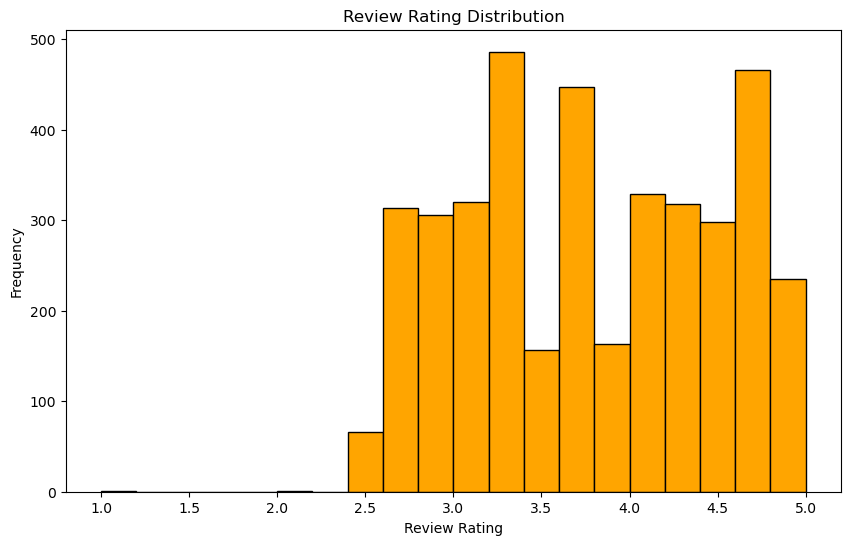

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(shopping_data['Review Rating'], bins=20, color='orange', edgecolor='k')
plt.title('Review Rating Distribution')
plt.xlabel('Review Rating')
plt.ylabel('Frequency')
plt.show()

This presents the distribution of review ratings prvoided by the customers. The data shows that most reviews cluster around the 3.0 to 4.5 range, with a peak around 3.5. This shows that customer satisfaction is generally moderate to high. Retailers could use this insight in turn to identify areas for improvement in their products or services to enhance customer satisfaction further.

#### Subscription Status Distribution

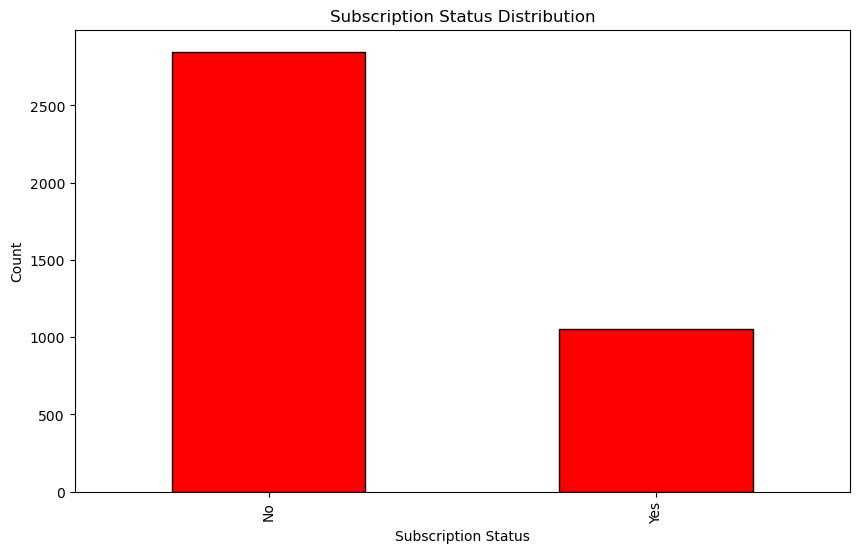

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
shopping_data['Subscription Status'].value_counts().plot(kind='bar', color='red', edgecolor='k')
plt.title('Subscription Status Distribution')
plt.xlabel('Subscription Status')
plt.ylabel('Count')
plt.show()

The bar plot shows the distribution of subscription status among the customers. It reveals that a significant majority of the customers don't have a subscription, while a smaller portion are subscribed customers. Retailers might use this information help develop their subscription offerings.

#### Payment Method Distribution

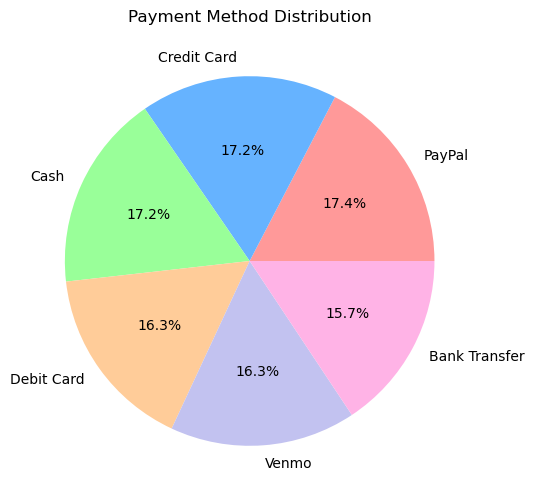

In [ ]:
plt.figure(figsize=(10, 6))
shopping_data['Payment Method'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6'])
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.show()


The pie chart shows the breakdown of various payment methods which were used by the customers. It shows that PayPal, Credit Card, and Cash are the most commonly used payment methods, each accounting for approximately 17% of the transactions. This may be helpful for retailers as it would allow them to optimize payment options and possibly introduce new methods.

#### Analytical Distribution

In [ ]:
# Identify and cap outliers in Purchase Amount (USD)
import numpy as np

def cap_outliers(data, column, upper_quantile=0.99):
    cap_value = data[column].quantile(upper_quantile)
    data[column] = np.where(data[column] > cap_value, cap_value, data[column])
    return data

shopping_data = cap_outliers(shopping_data, 'Purchase Amount (USD)')

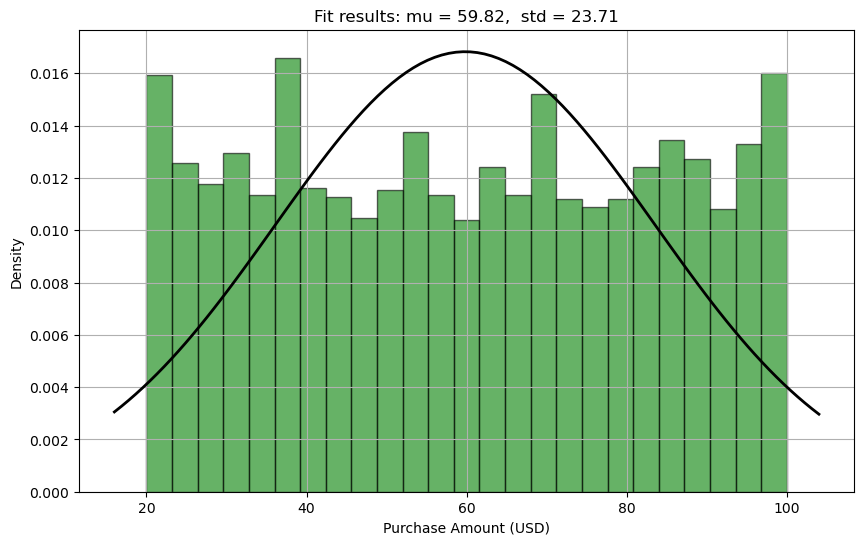

In [ ]:
from scipy.stats import norm

# Fit a normal distribution to the data
data = shopping_data['Purchase Amount (USD)']
mu, std = norm.fit(data)

# Plot the histogram of the pruchase amount data
plt.figure(figsize=(10, 6))
plt.hist(data, bins=25, density=True, alpha=0.6, color='g', edgecolor='black')

# Plot the PDF of the fitted normal distribution
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = f"Fit results: mu = {mu:.2f},  std = {std:.2f}"
plt.title(title)
plt.xlabel('Purchase Amount (USD)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# Modeling & Feature Selection

#### Drop any features that will not be useful to the model

In [ ]:
# Display the columns in the dataset
shopping_data.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [ ]:
# Drop Customer ID
shopping_data = shopping_data.drop(columns=['Customer ID'])

The Customer ID feature is dropped because it is a unique identifier. These are not going to provide us with any information for predicting consumer spending behavior.

#### Data Extraction/Selection

In [ ]:
# Filter the data for a specific season if necessary
# shopping_data = shopping_data[shopping_data['Season'] == 'Winter']

In this step, we ensure that the dataset is focused on the relevant subset of data that aligns with our analysis objectives.

#### Transform Features

Transforming features can help in making the data more suitable for modeling. This might include normalizing numerical features or encoding categorical variables.

In [ ]:
# Normalize the Purchase Amount feature
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
shopping_data['Purchase Amount (USD)'] = scaler.fit_transform(shopping_data[['Purchase Amount (USD)']])

# Encoding the categorical variables if necessary
shopping_data = pd.get_dummies(shopping_data, columns=['Payment Method', 'Gender', 'Season'])

The Purchase Amount (USD) feature is normalized to ensure that it has a mean of 0 and a standard deviation of 1, which helps in improving model performance. Categorical variables like Payment Method, Gender, and Season are encoded using dummy variables to convert them into numerical format.

#### Engineer New Features

Feature engineering involves creating new features that might be useful for the model. This could be based on domain knowledge or exploratory data analysis.

In [ ]:
# Create a new feature representing the average purchase amount per previous purchase
shopping_data['Avg Purchase per Previous Purchase'] = shopping_data['Purchase Amount (USD)'] / (shopping_data['Previous Purchases'] + 1)

A new feature Avg Purchase per Previous Purchase is created as it could be a useful indicator. 

#### Handle Missing Data

We will handle the missing data by imputing values or justification to drop rows/columns.

In [ ]:
# Check for missing data
shopping_data.isnull().sum()

# Impute missing values for the numerical features
shopping_data['Review Rating'].fillna(shopping_data['Review Rating'].mean(), inplace=True)

# Impute missing values for the categorical features
shopping_data['Subscription Status'].fillna(shopping_data['Subscription Status'].mode()[0], inplace=True)


Removing the values using this approach above helps in retaining as much data as possible while handling the missing values appropriately.

#### Create Dummy Variables


In [ ]:
# Convert all of the categorical variables to dummy variables
shopping_data = pd.get_dummies(shopping_data, columns=[
    'Item Purchased', 'Category', 'Location', 'Size', 'Color',
    'Shipping Type', 'Discount Applied', 'Promo Code Used', 'Subscription Status',
    'Frequency of Purchases'
])

# Display first couple of rows
shopping_data.head()


,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Payment Method_Bank Transfer,Payment Method_Cash,Payment Method_Credit Card,Payment Method_Debit Card,Payment Method_PayPal,Payment Method_Venmo,...,Promo Code Used_Yes,Subscription Status_No,Subscription Status_Yes,Frequency of Purchases_Annually,Frequency of Purchases_Bi-Weekly,Frequency of Purchases_Every 3 Months,Frequency of Purchases_Fortnightly,Frequency of Purchases_Monthly,Frequency of Purchases_Quarterly,Frequency of Purchases_Weekly
0,55,-0.287458,3.1,14,False,False,False,False,False,True,...,True,False,True,False,False,False,True,False,False,False
1,19,0.176464,3.1,2,False,True,False,False,False,False,...,True,False,True,False,False,False,True,False,False,False
2,50,0.556037,3.1,23,False,False,True,False,False,False,...,True,False,True,False,False,False,False,False,False,True
3,21,1.273007,3.5,49,False,False,False,False,True,False,...,True,False,True,False,False,False,False,False,False,True
4,45,-0.456157,2.7,31,False,False,False,False,True,False,...,True,False,True,True,False,False,False,False,False,False




---

#### Model Selection

In order to determine the most suitable model for predicting consumer spending behavior, we need to consider the nature of our target variable, which is continuous ("Purchase Amount (USD)"). For this reason, we will begin with a linear regression model. Linear regression is a fundamental, widely used technique for predicting continuous outcomes based on one or more features.

#### Splitting the Data
We will split the data into training and testing sets to evaluate the model's performance.

In [ ]:
from sklearn.model_selection import train_test_split

# Define the target variable and feature set
X = shopping_data.drop(columns=['Purchase Amount (USD)'])
y = shopping_data['Purchase Amount (USD)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


The data is split into training (80%) and testing (20%) sets to evaluate the model's performance on unseen data.

#### Training the Model

We will train the linear regression model using the training data.

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

The linear regression model is trained using the training data which would help us learn about the relationship between the features and the target variable.

#### Evaluating the Model


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R-squared:', r2)


Mean Absolute Error: 0.6485215654551152
Mean Squared Error: 0.623164307423897
R-squared: 0.3517729862363821


Mean Absolute Error (MAE): Measures the average magnitude of the errors in a set of predictions, without considering their direction.
Mean Squared Error (MSE): Measures the average of the squares of the errors. It gives a higher weight to large errors.
R-squared: Represents the proportion of the variance in the dependent variable that is predictable from the independent variables.


#### Actual Vs Predicted Amounts

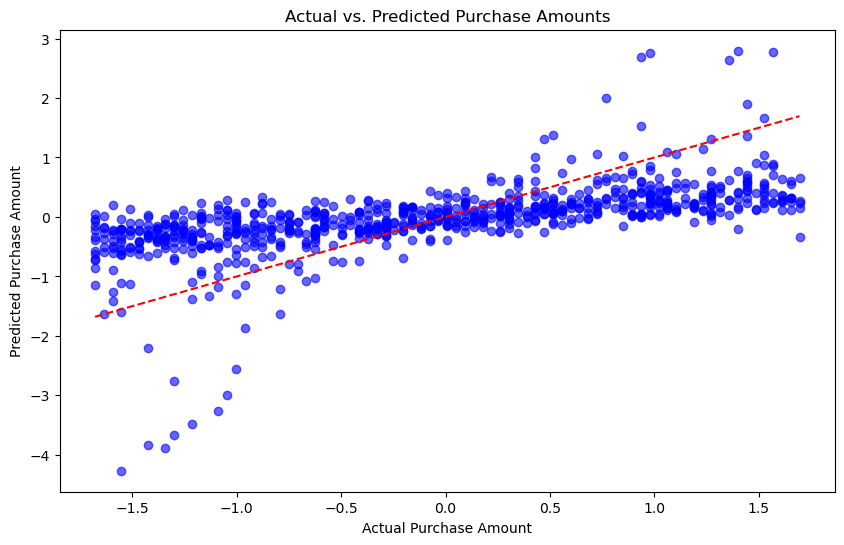

In [ ]:
# Create a scatter plot to compare actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Line for perfect predictions
plt.xlabel('Actual Purchase Amount')
plt.ylabel('Predicted Purchase Amount')
plt.title('Actual vs. Predicted Purchase Amounts')
plt.show()